In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from scipy.stats import zscore
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
path = 'drive/MyDrive/Questions and Dataset'

**1. Import and warehouse data:**
* Import all the given datasets and explore shape and size of each.
* Merge all datasets onto one and explore final shape and size.

In [5]:
Part2d1 = pd.read_csv(path + '/Part2 - Data1.csv')

In [ ]:
Part2d1.shape

(5000, 8)

In [6]:
Part2d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   int64  
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 312.6 KB


In [8]:
Part2d2 = pd.read_csv(path + '/Part2 -Data2.csv')

In [ ]:
Part2d2.shape

(5000, 7)

In [7]:
Part2d2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Mortgage             5000 non-null   int64  
 2   Security             5000 non-null   int64  
 3   FixedDepositAccount  5000 non-null   int64  
 4   InternetBanking      5000 non-null   int64  
 5   CreditCard           5000 non-null   int64  
 6   LoanOnCard           4980 non-null   float64
dtypes: float64(1), int64(6)
memory usage: 273.6 KB


In [9]:
df2 = pd.merge(Part2d1,Part2d2, on = 'ID')

In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   int64  
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   int64  
 8   Mortgage             5000 non-null   int64  
 9   Security             5000 non-null   int64  
 10  FixedDepositAccount  5000 non-null   int64  
 11  InternetBanking      5000 non-null   int64  
 12  CreditCard           5000 non-null   int64  
 13  LoanOnCard           4980 non-null   float64
dtypes: float64(2), int64(12)
memory usage: 585.9 KB


In [ ]:
df2.head(15)

In [13]:
df2.shape

(5000, 14)

In [11]:
df2.size

70000

**2. Data cleansing:**
* Explore and if required correct the datatypes of each attribute
* Explore for null values in the attributes and if required drop or impute values.

In [10]:
df2.isna().sum()

ID                      0
Age                     0
CustomerSince           0
HighestSpend            0
ZipCode                 0
HiddenScore             0
MonthlyAverageSpend     0
Level                   0
Mortgage                0
Security                0
FixedDepositAccount     0
InternetBanking         0
CreditCard              0
LoanOnCard             20
dtype: int64

In [11]:
df2 = df2.dropna()

df2 = df2.dropna() - This will all the 20 rows as LoanOnCard attriute having missing values. We can drop these values as these are very less as compared to the size of overall data set that contains 5000 rows.

In [12]:
df2.shape

(4980, 14)

In [ ]:
df2.tail(15)

In [17]:
df2.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
9,10,34,9,180,93023,1,8.9,3,0,0,0,0,0,1.0
10,11,65,39,105,94710,4,2.4,3,0,0,0,0,0,0.0
11,12,29,5,45,90277,3,0.1,2,0,0,0,1,0,0.0
12,13,48,23,114,93106,2,3.8,3,0,1,0,0,0,0.0
13,14,59,32,40,94920,4,2.5,2,0,0,0,1,0,0.0


Applying one hot encoding technique to categorical columns of data set

In [13]:
catvar = ['HiddenScore','Level']

In [14]:
df3 = pd.get_dummies(df2, columns = catvar)

In [15]:
df3

,ID,Age,CustomerSince,HighestSpend,ZipCode,MonthlyAverageSpend,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard,HiddenScore_1,HiddenScore_2,HiddenScore_3,HiddenScore_4,Level_1,Level_2,Level_3
9,10,34,9,180,93023,8.9,0,0,0,0,0,1.0,1,0,0,0,0,0,1
10,11,65,39,105,94710,2.4,0,0,0,0,0,0.0,0,0,0,1,0,0,1
11,12,29,5,45,90277,0.1,0,0,0,1,0,0.0,0,0,1,0,0,1,0
12,13,48,23,114,93106,3.8,0,1,0,0,0,0.0,0,1,0,0,0,0,1
13,14,59,32,40,94920,2.5,0,0,0,1,0,0.0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1.9,0,0,0,1,0,0.0,1,0,0,0,0,0,1
4996,4997,30,4,15,92037,0.4,85,0,0,1,0,0.0,0,0,0,1,1,0,0
4997,4998,63,39,24,93023,0.3,0,0,0,0,0,0.0,0,1,0,0,0,0,1
4998,4999,65,40,49,90034,0.5,0,0,0,1,0,0.0,0,0,1,0,0,1,0


In [17]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4980 entries, 9 to 4999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   4980 non-null   int64  
 1   Age                  4980 non-null   int64  
 2   CustomerSince        4980 non-null   int64  
 3   HighestSpend         4980 non-null   int64  
 4   ZipCode              4980 non-null   int64  
 5   MonthlyAverageSpend  4980 non-null   float64
 6   Mortgage             4980 non-null   int64  
 7   Security             4980 non-null   int64  
 8   FixedDepositAccount  4980 non-null   int64  
 9   InternetBanking      4980 non-null   int64  
 10  CreditCard           4980 non-null   int64  
 11  LoanOnCard           4980 non-null   float64
 12  HiddenScore_1        4980 non-null   uint8  
 13  HiddenScore_2        4980 non-null   uint8  
 14  HiddenScore_3        4980 non-null   uint8  
 15  HiddenScore_4        4980 non-null   u

df3 is the dataframe that contains one hot encoding.

**3. Data analysis & visualisation:**
* Perform detailed statistical analysis on the data.
* Perform a detailed univariate, bivariate and multivariate analysis with appropriate detailed comments after each analysis.

* Performing analysis and visualisation on df2 dataframe. 
* df2 - only removed 20 null value rows




In [20]:
df2.describe()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
count,4980.000000,4980.000000,4980.000000,4980.00000,4980.000000,4980.000000,4980.000000,4980.000000,4980.000000,4980.000000,4980.000000,4980.000000,4980.000000,4980.000000
mean,2510.345382,45.352610,20.117671,73.85241,93152.420482,2.395582,1.939536,1.880924,56.589759,0.104418,0.060643,0.597189,0.294378,0.096386
std,1438.011129,11.464212,11.468716,46.07009,2123.660073,1.147200,1.750006,0.840144,101.836758,0.305832,0.238697,0.490513,0.455808,0.295149
min,10.000000,23.000000,-3.000000,8.00000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1265.750000,35.000000,10.000000,39.00000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2510.500000,45.000000,20.000000,64.00000,93407.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,3755.250000,55.000000,30.000000,98.00000,94608.000000,3.000000,2.525000,3.000000,101.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,5000.000000,67.000000,43.000000,224.00000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
df2.corr()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
ID,1.000000,-0.010682,-0.010366,-0.020739,0.013543,-0.015721,-0.026419,0.021763,-0.015546,-0.017160,-0.008690,-0.003940,0.015741,-0.027188
Age,-0.010682,1.000000,0.994208,-0.054951,-0.029939,-0.045289,-0.051896,0.042750,-0.013272,0.000323,0.007744,0.011227,0.007344,-0.008147
CustomerSince,-0.010366,0.994208,1.000000,-0.046092,-0.029415,-0.051456,-0.049918,0.014545,-0.011380,-0.000469,0.010085,0.011355,0.008779,-0.007801
HighestSpend,-0.020739,-0.054951,-0.046092,1.000000,-0.016447,-0.158357,0.646109,-0.188909,0.207236,-0.002284,0.169535,0.014202,-0.002780,0.502626
ZipCode,0.013543,-0.029939,-0.029415,-0.016447,1.000000,0.012250,-0.004339,-0.017274,0.007214,0.006312,0.020007,0.017186,0.007302,0.000120
HiddenScore,-0.015721,-0.045289,-0.051456,-0.158357,0.012250,1.000000,-0.109180,0.065762,-0.021396,0.019061,0.014327,0.010900,0.010784,0.061761
MonthlyAverageSpend,-0.026419,-0.051896,-0.049918,0.646109,-0.004339,-0.109180,1.000000,-0.137020,0.110275,0.015105,0.136410,-0.003475,-0.006577,0.366912
Level,0.021763,0.042750,0.014545,-0.188909,-0.017274,0.065762,-0.137020,1.000000,-0.032863,-0.009443,0.013982,-0.014556,-0.011766,0.137010
Mortgage,-0.015546,-0.013272,-0.011380,0.207236,0.007214,-0.021396,0.110275,-0.032863,1.000000,-0.005002,0.089167,-0.007044,-0.007600,0.141947
Security,-0.017160,0.000323,-0.000469,-0.002284,0.006312,0.019061,0.015105,-0.009443,-0.005002,1.000000,0.317673,0.014007,-0.014518,0.021982


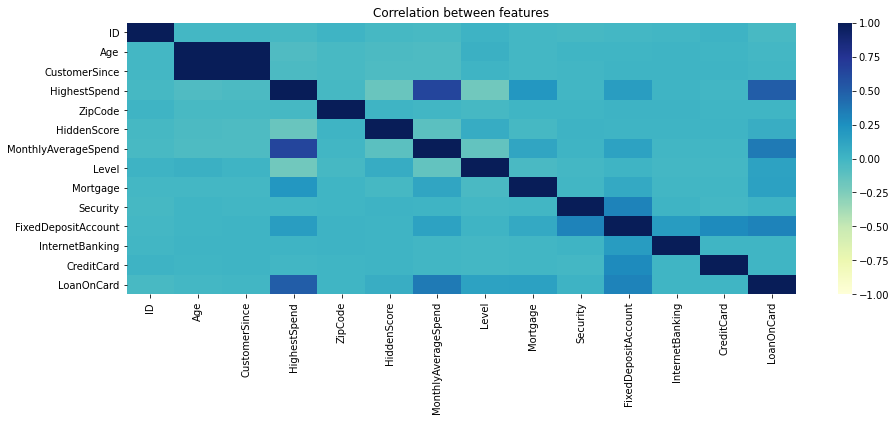

In [22]:
corr = df2.corr()
plt.figure(figsize=(15,5))
sns.heatmap(corr, cmap = 'YlGnBu', vmax = 1.0, vmin = -1.0)
plt.title('Correlation between features')
plt.show()

**Positive Relationship**  
Age and CustomerSince, HighSpend and MonthlyAverageSpend, HighSpend and LoanOnCard, HighSpend and Mortgage, HighSpend and FixedDepositAccount, CreditCard and FixedDepositAccount, LoanOnCard and FixedDepositAccount etc

** Negative Relationship**
* HighSpend and HiddenScore, HighSpend and Level, HiddenScore and MonthlyAverageSpend.



In [23]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4980 entries, 9 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   4980 non-null   int64  
 1   Age                  4980 non-null   int64  
 2   CustomerSince        4980 non-null   int64  
 3   HighestSpend         4980 non-null   int64  
 4   ZipCode              4980 non-null   int64  
 5   HiddenScore          4980 non-null   int64  
 6   MonthlyAverageSpend  4980 non-null   float64
 7   Level                4980 non-null   int64  
 8   Mortgage             4980 non-null   int64  
 9   Security             4980 non-null   int64  
 10  FixedDepositAccount  4980 non-null   int64  
 11  InternetBanking      4980 non-null   int64  
 12  CreditCard           4980 non-null   int64  
 13  LoanOnCard           4980 non-null   float64
dtypes: float64(2), int64(12)
memory usage: 583.6 KB


**Univariate Analysis**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2d92a07a90>,
      dtype=object)

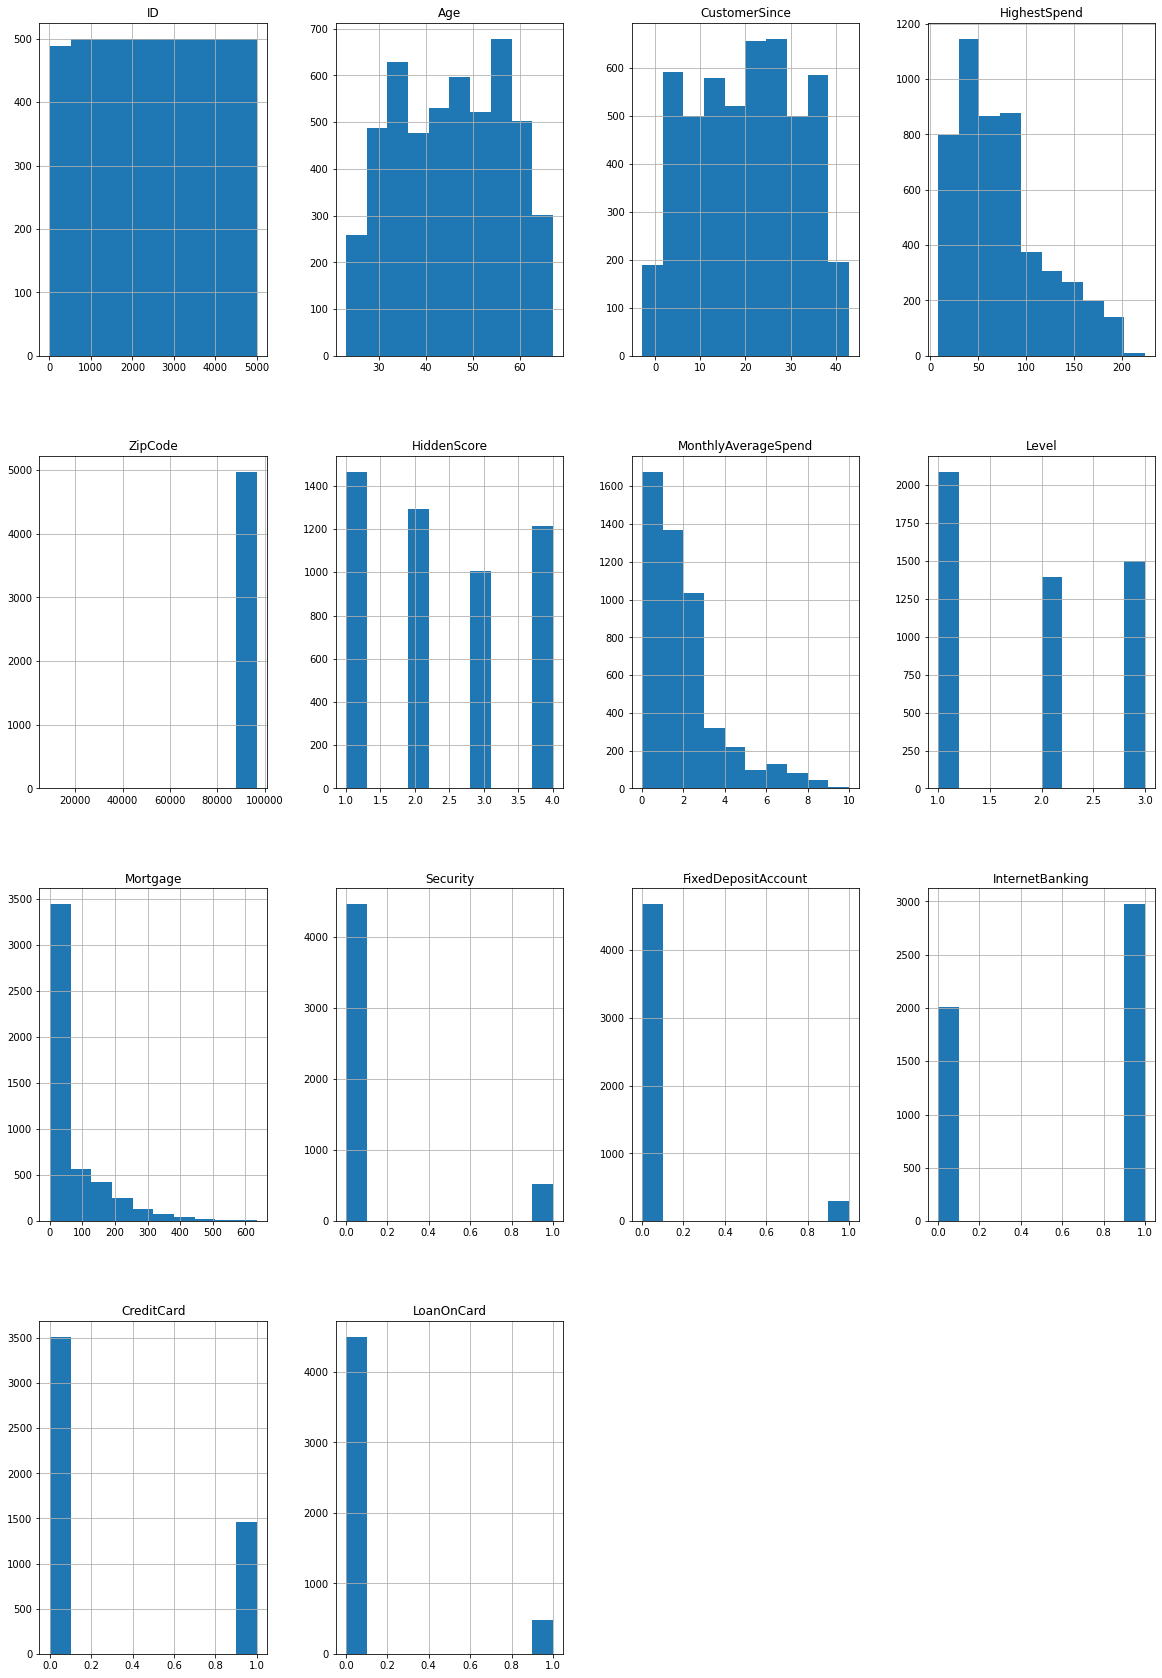

In [15]:
df2.hist(figsize=(20,30))

**Categorical Variables**
* LoanOnCard
* CreditCard
* InternetBanking
* Security
* FixedDepositAccount
* HiddenScore
* Level

**Bivariate Analysis**

In [24]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4980 entries, 9 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   4980 non-null   int64  
 1   Age                  4980 non-null   int64  
 2   CustomerSince        4980 non-null   int64  
 3   HighestSpend         4980 non-null   int64  
 4   ZipCode              4980 non-null   int64  
 5   HiddenScore          4980 non-null   int64  
 6   MonthlyAverageSpend  4980 non-null   float64
 7   Level                4980 non-null   int64  
 8   Mortgage             4980 non-null   int64  
 9   Security             4980 non-null   int64  
 10  FixedDepositAccount  4980 non-null   int64  
 11  InternetBanking      4980 non-null   int64  
 12  CreditCard           4980 non-null   int64  
 13  LoanOnCard           4980 non-null   float64
dtypes: float64(2), int64(12)
memory usage: 583.6 KB


**Positive Relationship**  
Age and CustomerSince, HighSpend and MonthlyAverageSpend, HighSpend and LoanOnCard, HighSpend and Mortgage, HighSpend and FixedDepositAccount, CreditCard and FixedDepositAccount, LoanOnCard and FixedDepositAccount etc

** Negative Relationship**
* HighSpend and HiddenScore, HighSpend and Level, HiddenScore and MonthlyAverageSpend.

**Categorical Variables**
* LoanOnCard
* CreditCard
* InternetBanking
* Security
* FixedDepositAccount
* HiddenScore
* Level

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


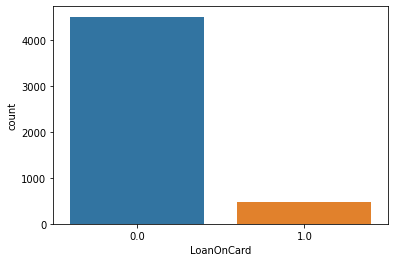

In [25]:
sns.countplot(df2['LoanOnCard'])

Looks like data is imbalanced.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


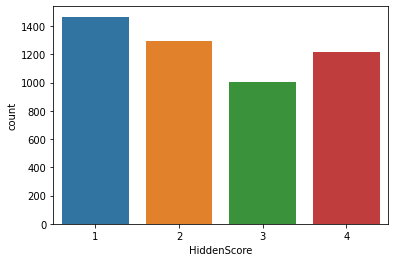

In [26]:
sns.countplot(df2['HiddenScore'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


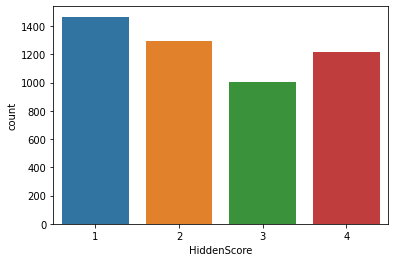

In [28]:
sns.countplot(df2['HiddenScore'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


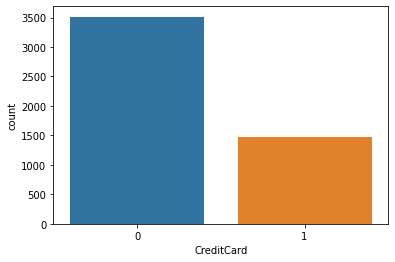

In [30]:
sns.countplot(df2['CreditCard'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


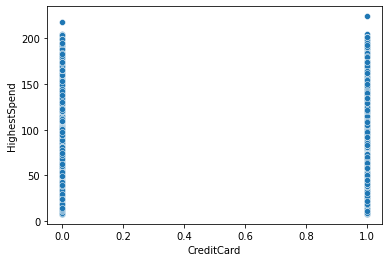

In [34]:
sns.scatterplot(df2['CreditCard'], df2['HighestSpend'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


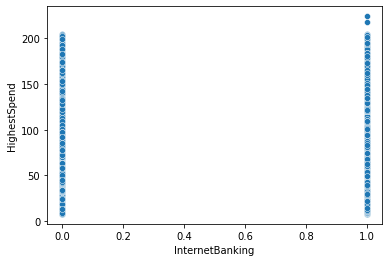

In [36]:
sns.scatterplot(df2['InternetBanking'], df2['HighestSpend'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


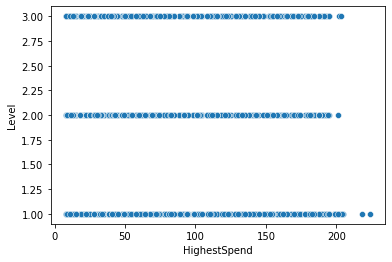

In [37]:
sns.scatterplot(df2['HighestSpend'], df2['Level'],)

**Multivariate Analysis**

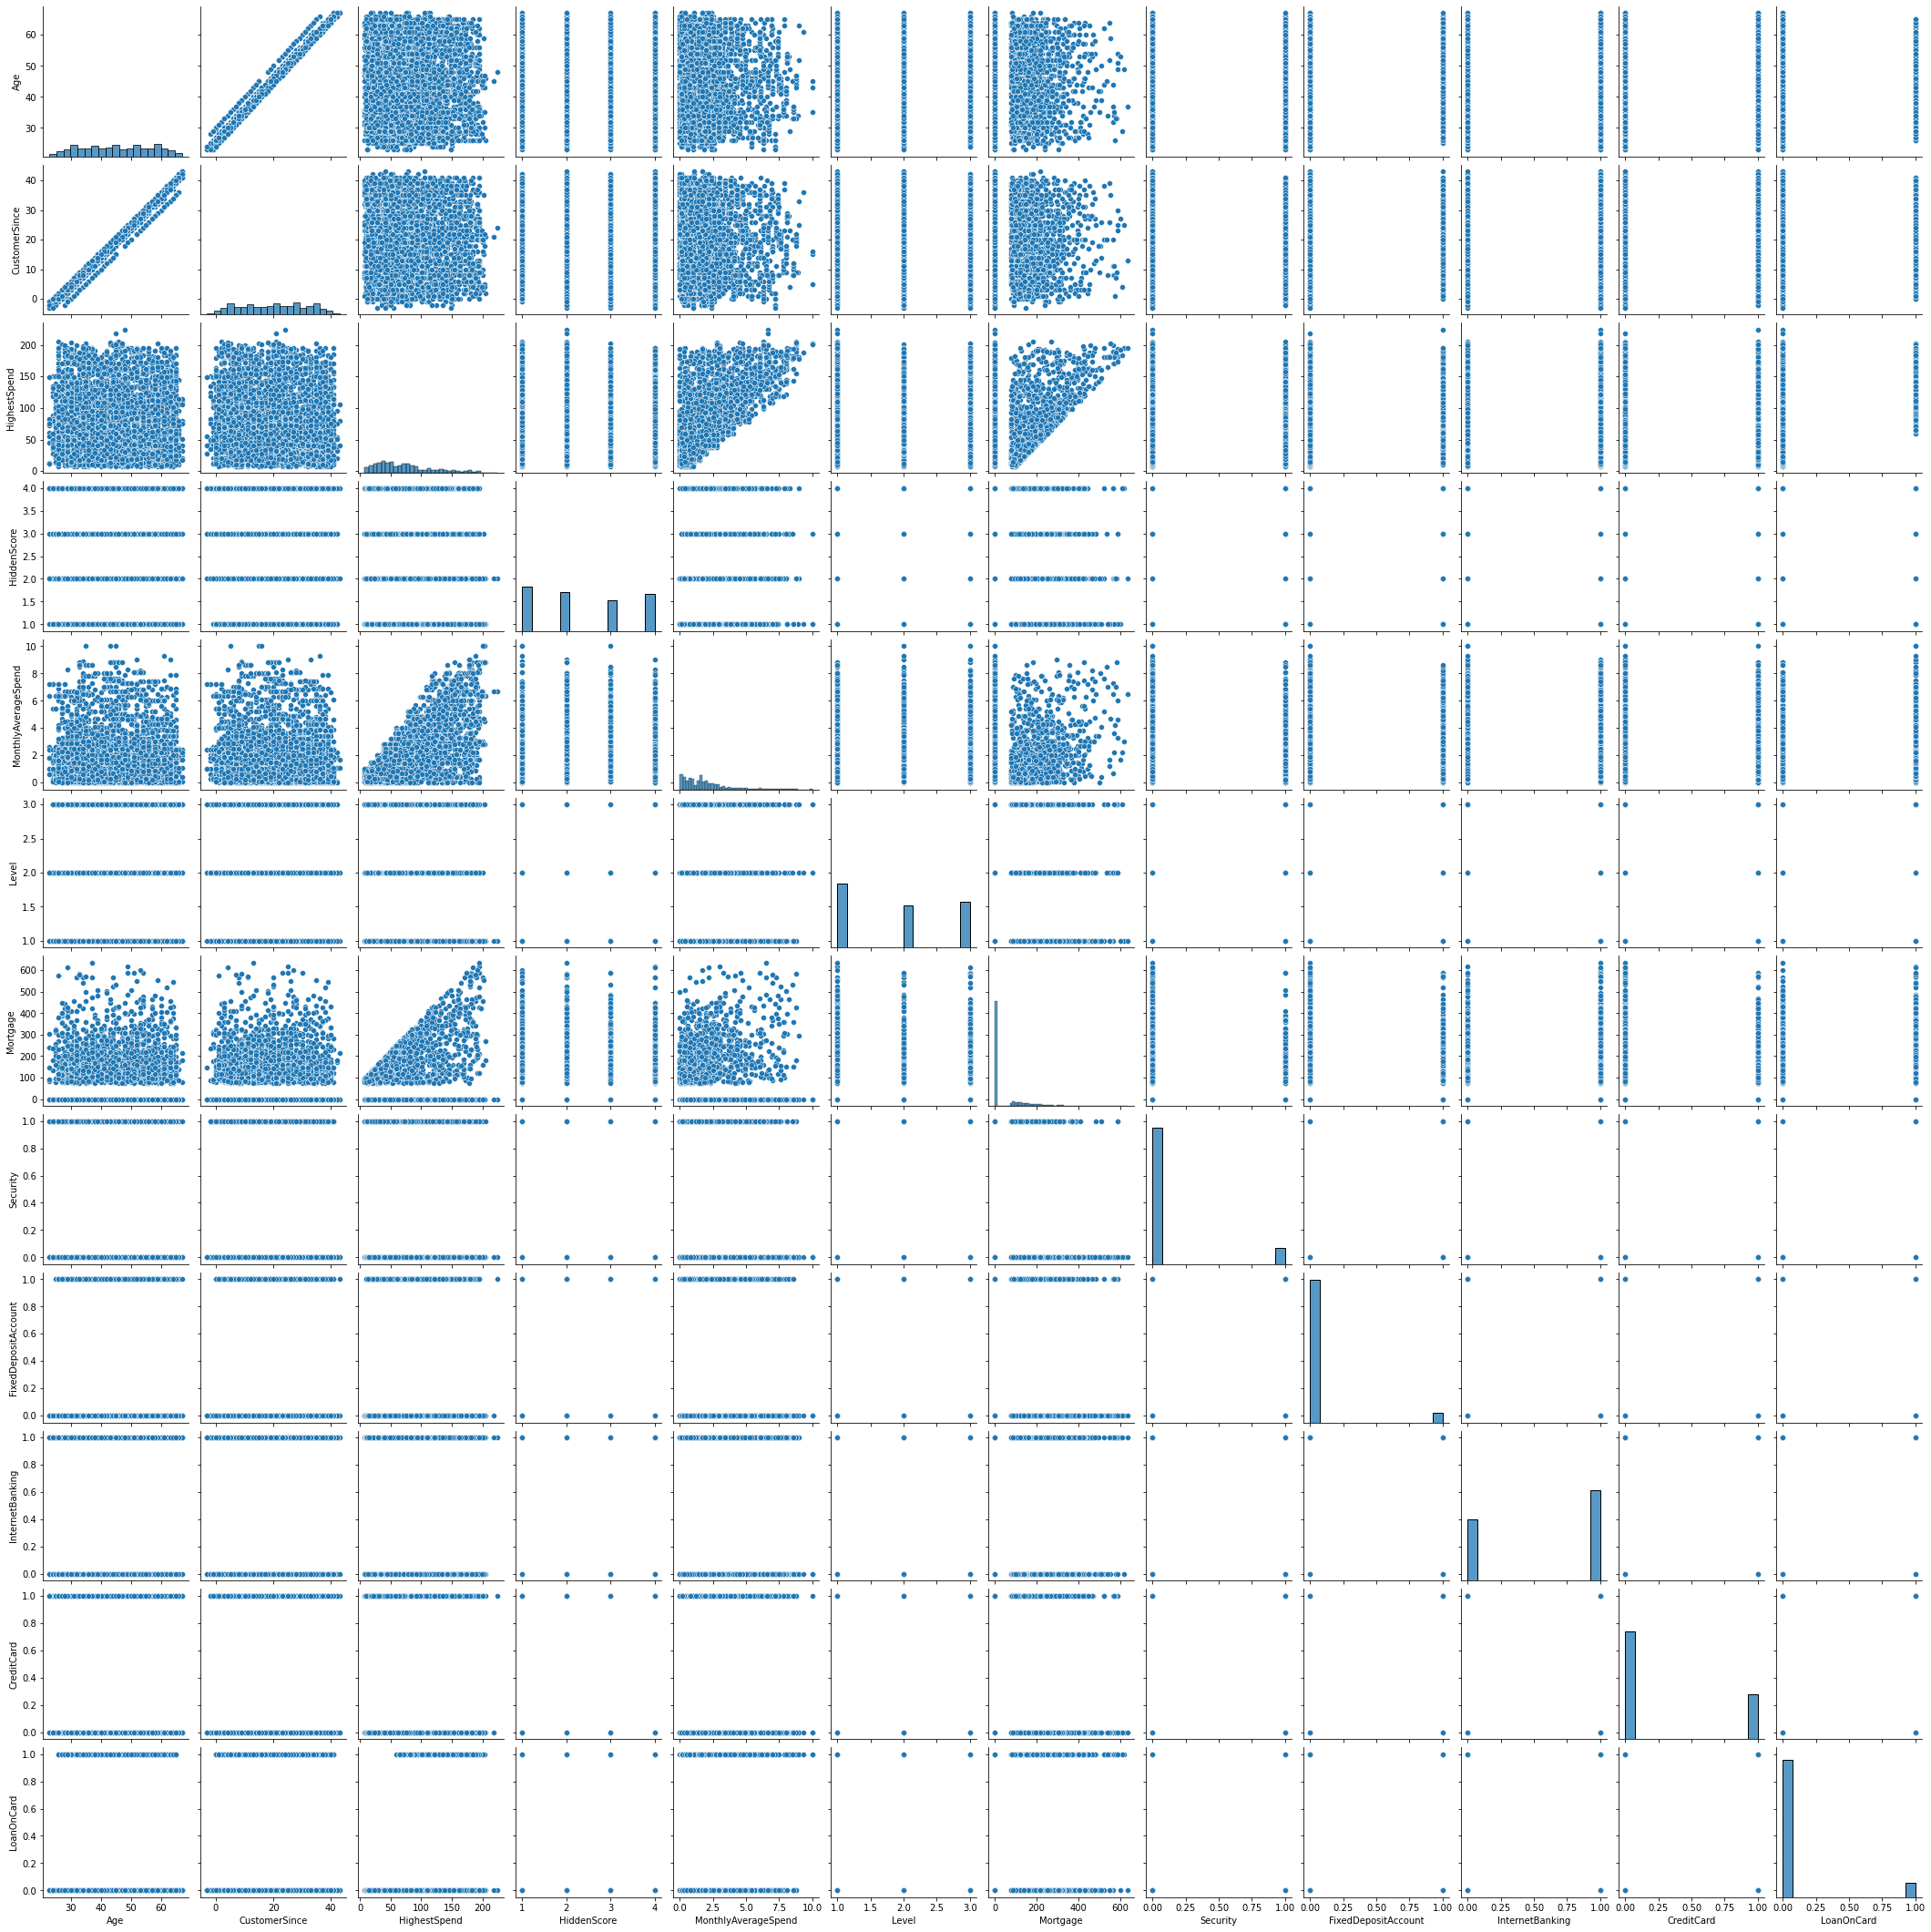

In [32]:
sns.pairplot(df2)

* Can see a linear relationship between some variables
* Most of the Variables are categorical

**4. Data pre-processing:**
* Segregate predictors vs target attributes
* Check for target balancing and fix it if found imbalanced.
* Perform train-test split.

**Upsample of minority class 1 of LoanOnCard**

In [55]:
df2.LoanOnCard.value_counts()

0.0    4500
1.0     480
Name: LoanOnCard, dtype: int64

Below code is for balancing the target and modelling

In [56]:
df_majority = df2[df2.LoanOnCard == 0]
df_minority = df2[df2.LoanOnCard == 1]

In [57]:
df_minority_upsampled = resample(df_minority,replace=True,n_samples = 2000, random_state = 123)

In [58]:
df_minority_upsampled.shape

(2000, 14)

In [59]:
df_upsampled = pd.concat([df_majority,df_minority_upsampled])

In [60]:
df_upsampled.LoanOnCard.value_counts()

0.0    4500
1.0    2000
Name: LoanOnCard, dtype: int64

In [61]:
df_upsampled.shape

(6500, 14)

In [62]:
Y_upsample = df_upsampled.LoanOnCard

In [63]:
X_upsample = df_upsampled.drop('LoanOnCard', axis=1)

In [64]:
X_upsample.shape

(6500, 13)

In [65]:
X_upsample.drop(['ID','ZipCode'], axis=1, inplace=True)

In [66]:
X_upsample_train, X_upsample_test, Y_upsample_train, Y_upsample_test = train_test_split(X_upsample, Y_upsample, test_size=0.40, random_state=1)

In [67]:
X_upsample_train.shape

(3900, 11)

In [68]:
Y_upsample_train.shape

(3900,)

**5. Model training, testing and tuning:**
* Design and train a Logistic regression and Naive Bayes classifiers.
* Display the classification accuracies for train and test data.
* Display and explain the classification report in detail.
* Apply all the possible tuning techniques to train the best model for the given data. Select the final best trained model with
your comments for selecting this model.

**Logistic Regression on upsampling minority Data**

In [69]:
LRtree_upsample_model = LogisticRegression(solver='liblinear')

In [70]:
LRtree_upsample_model.fit(X_upsample_train,Y_upsample_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [71]:
X_upsample_train.shape

(3900, 11)

In [72]:
Y_upsample_test_pred = LRtree_upsample_model.predict(X_upsample_test)

In [45]:
coef_upsample = pd.DataFrame(LRtree_upsample_model.coef_)
coef_upsample['Intercept'] = LRtree_upsample_model.intercept_

In [46]:
coef_upsample


,0,1,2,3,4,5,6,7,8,9,10,Intercept
0,-0.30002,0.299215,0.052022,0.560073,0.195595,1.528124,0.000588,-1.136774,3.539384,-0.549215,-1.013046,-3.457158


In [73]:
print(LRtree_upsample_model.score(X_upsample_train, Y_upsample_train))
print(LRtree_upsample_model.score(X_upsample_test, Y_upsample_test))

0.9023076923076923
0.8969230769230769


Confusion Matrix


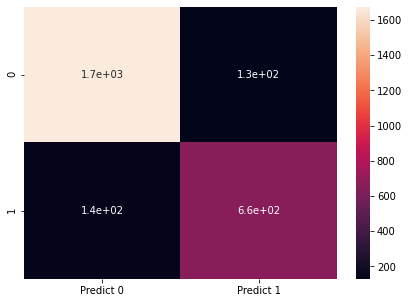

In [74]:
from sklearn import metrics

print("Confusion Matrix")
cm=metrics.confusion_matrix(Y_upsample_test, Y_upsample_test_pred, labels=[0,1])

df_cm = pd.DataFrame(cm, index = [i for i in [0,1]],
                  columns = [i for i in ["Predict 0","Predict 1"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [97]:
print(classification_report(Y_upsample_test, Y_upsample_test_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.93      0.93      1803
         1.0       0.84      0.83      0.83       797

    accuracy                           0.90      2600
   macro avg       0.88      0.88      0.88      2600
weighted avg       0.90      0.90      0.90      2600



**NaiveBayes Classifier on dataframe df2 having Upsampling of minority data**

In [48]:
NB_upsample_model = GaussianNB()
NB_upsample_model.fit(X_upsample_train,Y_upsample_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [49]:
NB_Y_upsample_pred = NB_upsample_model.predict(X_upsample_test)

In [50]:
print(NB_upsample_model.score(X_upsample_train, Y_upsample_train))
print(NB_upsample_model.score(X_upsample_test, Y_upsample_test))


0.8425641025641025
0.8376923076923077


* When we Upsample the minority data, then from the above results we came to know that almost similar accucracy in both the models(Logistic Regression and Naiye Bayes) for train and test. 
* Score of Naive Bayes is lesser then Logistic Regression.

**For classification report, I am taking Naive Bayes model**

**Classification Report**

Confusion Matrix


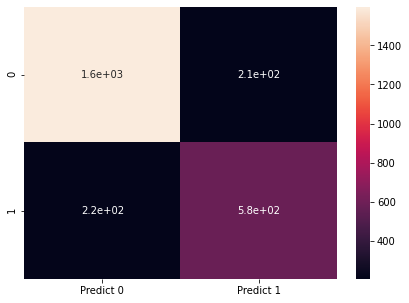

In [91]:
from sklearn import metrics

print("Confusion Matrix")
cm=metrics.confusion_matrix(Y_upsample_test, NB_Y_upsample_pred, labels=[0,1])

df_cm = pd.DataFrame(cm, index = [i for i in [0,1]],
                  columns = [i for i in ["Predict 0","Predict 1"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [92]:
print(classification_report(Y_upsample_test, NB_Y_upsample_pred))

              precision    recall  f1-score   support

         0.0       0.88      0.89      0.88      1803
         1.0       0.74      0.73      0.73       797

    accuracy                           0.84      2600
   macro avg       0.81      0.81      0.81      2600
weighted avg       0.84      0.84      0.84      2600



* From the classification report of LR and Naive Bayes, we can see from above that f1 score of LR is more than f1 score of Naive Bayes.
* Difference between test and train accuracies is somewhat similar
* Therefore from above two points we can say that LR model is better than Naive Bayes.

**Analysis on df3 dataframe that includes one hot encoding, Feature Scaling, Upsampling of minority data by Logistic Regression and Naive Bayes**

In [16]:
df3

,ID,Age,CustomerSince,HighestSpend,ZipCode,MonthlyAverageSpend,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard,HiddenScore_1,HiddenScore_2,HiddenScore_3,HiddenScore_4,Level_1,Level_2,Level_3
9,10,34,9,180,93023,8.9,0,0,0,0,0,1.0,1,0,0,0,0,0,1
10,11,65,39,105,94710,2.4,0,0,0,0,0,0.0,0,0,0,1,0,0,1
11,12,29,5,45,90277,0.1,0,0,0,1,0,0.0,0,0,1,0,0,1,0
12,13,48,23,114,93106,3.8,0,1,0,0,0,0.0,0,1,0,0,0,0,1
13,14,59,32,40,94920,2.5,0,0,0,1,0,0.0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1.9,0,0,0,1,0,0.0,1,0,0,0,0,0,1
4996,4997,30,4,15,92037,0.4,85,0,0,1,0,0.0,0,0,0,1,1,0,0
4997,4998,63,39,24,93023,0.3,0,0,0,0,0,0.0,0,1,0,0,0,0,1
4998,4999,65,40,49,90034,0.5,0,0,0,1,0,0.0,0,0,1,0,0,1,0


In [17]:
df3.LoanOnCard.value_counts()

0.0    4500
1.0     480
Name: LoanOnCard, dtype: int64

In [18]:
df3_majority = df3[df3.LoanOnCard == 0]
df3_minority = df3[df3.LoanOnCard == 1]

In [19]:
df3_minority_upsampled = resample(df3_minority,replace=True,n_samples = 2000, random_state = 123)

In [20]:
df3_upsampled = pd.concat([df3_majority,df3_minority_upsampled])

In [21]:
df3_upsampled.LoanOnCard.value_counts()

0.0    4500
1.0    2000
Name: LoanOnCard, dtype: int64

In [22]:
Y_df3 =  df3_upsampled.LoanOnCard

In [23]:
X_df3 = df3_upsampled.drop('LoanOnCard', axis=1)

In [24]:
scaledX_df3 = X_df3.apply(zscore)

In [25]:
scaledX_df3

,ID,Age,CustomerSince,HighestSpend,ZipCode,MonthlyAverageSpend,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,HiddenScore_1,HiddenScore_2,HiddenScore_3,HiddenScore_4,Level_1,Level_2,Level_3
10,-1.732370,1.721074,1.652942,0.276365,0.760873,0.003821,-0.561133,-0.342097,-0.348516,-1.222393,-0.636237,-0.625275,-0.578535,-0.527989,1.731341,-0.759039,-0.658733,1.418959
11,-1.731671,-1.408127,-1.299456,-0.864237,-1.408159,-1.137734,-0.561133,-0.342097,-0.348516,0.818068,-0.636237,-0.625275,-0.578535,1.893979,-0.577587,-0.759039,1.518066,-0.704742
12,-1.730972,0.243396,0.263578,0.447455,-0.023952,0.698680,-0.561133,2.923147,-0.348516,-1.222393,-0.636237,-0.625275,1.728505,-0.527989,-0.577587,-0.759039,-0.658733,1.418959
13,-1.730272,1.199540,1.045096,-0.959287,0.863624,0.053454,-0.561133,-0.342097,-0.348516,0.818068,-0.636237,-0.625275,-0.578535,-0.527989,1.731341,-0.759039,1.518066,-0.704742
14,-1.729573,1.894918,1.826613,0.409435,-0.691836,-0.194710,-0.561133,2.923147,-0.348516,-1.222393,-0.636237,1.599295,-0.578535,-0.527989,-0.577587,1.317456,-0.658733,-0.704742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1349,-0.795999,-1.668893,-1.559962,1.531027,0.385586,1.790602,-0.561133,-0.342097,-0.348516,0.818068,-0.636237,-0.625275,-0.578535,1.893979,-0.577587,-0.759039,1.518066,-0.704742
2095,-0.274317,0.156473,0.089908,1.588057,0.425708,0.400883,-0.561133,-0.342097,-0.348516,-1.222393,-0.636237,-0.625275,-0.578535,-0.527989,1.731341,-0.759039,-0.658733,1.418959
183,-1.611390,-1.408127,-1.473127,1.093796,-0.480461,0.847579,-0.561133,-0.342097,-0.348516,0.818068,-0.636237,-0.625275,-0.578535,1.893979,-0.577587,1.317456,-0.658733,-0.704742
16,-1.728175,-0.625827,-0.517939,0.751616,0.907660,1.145376,0.551606,-0.342097,-0.348516,-1.222393,-0.636237,-0.625275,-0.578535,-0.527989,1.731341,-0.759039,-0.658733,1.418959


In [26]:
scaledX_df3.drop(['ID','ZipCode'], axis=1, inplace=True)

In [27]:
scaledX_df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6500 entries, 10 to 2841
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6500 non-null   float64
 1   CustomerSince        6500 non-null   float64
 2   HighestSpend         6500 non-null   float64
 3   MonthlyAverageSpend  6500 non-null   float64
 4   Mortgage             6500 non-null   float64
 5   Security             6500 non-null   float64
 6   FixedDepositAccount  6500 non-null   float64
 7   InternetBanking      6500 non-null   float64
 8   CreditCard           6500 non-null   float64
 9   HiddenScore_1        6500 non-null   float64
 10  HiddenScore_2        6500 non-null   float64
 11  HiddenScore_3        6500 non-null   float64
 12  HiddenScore_4        6500 non-null   float64
 13  Level_1              6500 non-null   float64
 14  Level_2              6500 non-null   float64
 15  Level_3              6500 non-null   

In [28]:
X_train_df3, X_test_df3, Y_train_df3, Y_test_df3 = train_test_split(scaledX_df3, Y_df3, test_size=0.40, random_state=1)

In [29]:
print(X_train_df3.shape)
print(X_test_df3.shape)

(3900, 16)
(2600, 16)


**Logistic Regression**

In [30]:
df3_LRmodel = LogisticRegression(solver='liblinear')
df3_LRmodel.fit(X_train_df3,Y_train_df3)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
 df3_train_pred = df3_LRmodel.predict(X_train_df3)
 df3_test_pred = df3_LRmodel.predict(X_test_df3)

In [32]:
print(df3_LRmodel.score(X_train_df3, Y_train_df3))
print(df3_LRmodel.score(X_test_df3, Y_test_df3))

0.9184615384615384
0.9103846153846153


Confusion Matrix


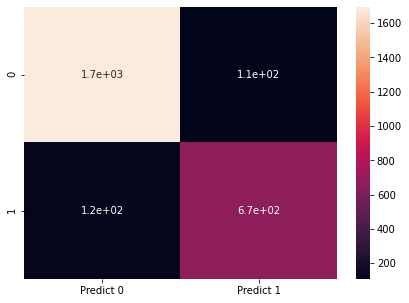

In [75]:
from sklearn import metrics

print("Confusion Matrix")
cm=metrics.confusion_matrix(Y_test_df3, df3_test_pred, labels=[0,1])

df_cm = pd.DataFrame(cm, index = [i for i in [0,1]],
                  columns = [i for i in ["Predict 0","Predict 1"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [33]:
print(classification_report(Y_test_df3, df3_test_pred))

              precision    recall  f1-score   support

         0.0       0.93      0.94      0.94      1803
         1.0       0.86      0.84      0.85       797

    accuracy                           0.91      2600
   macro avg       0.90      0.89      0.89      2600
weighted avg       0.91      0.91      0.91      2600



**Naive Bayes**

In [34]:
df3_NB_model = GaussianNB()
df3_NB_model.fit(X_train_df3,Y_train_df3)

GaussianNB(priors=None, var_smoothing=1e-09)

In [35]:
 df3_NB_train_pred = df3_NB_model.predict(X_train_df3)

In [36]:
df3_NB_test_pred = df3_NB_model.predict(X_test_df3)

In [37]:
print(df3_NB_model.score(X_train_df3, Y_train_df3))
print(df3_NB_model.score(X_test_df3, Y_test_df3))

0.8574358974358974
0.8496153846153847


Confusion Matrix


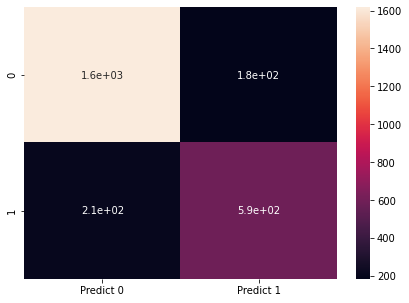

In [38]:
from sklearn import metrics

print("Confusion Matrix")
cm=metrics.confusion_matrix(Y_test_df3, df3_NB_test_pred, labels=[0,1])

df_cm = pd.DataFrame(cm, index = [i for i in [0,1]],
                  columns = [i for i in ["Predict 0","Predict 1"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [39]:
print(classification_report(Y_test_df3, df3_NB_test_pred))

              precision    recall  f1-score   support

         0.0       0.89      0.90      0.89      1803
         1.0       0.76      0.74      0.75       797

    accuracy                           0.85      2600
   macro avg       0.82      0.82      0.82      2600
weighted avg       0.85      0.85      0.85      2600



**From the classification report of both LR and Naive Bayes, we can see that f1 score for LR model for predicting 0 is 0.94, greater than f1 score of Naive Bayes. So, considering LR model is best**

In [40]:
    import numpy as np
    from sklearn import linear_model, decomposition, datasets
    from sklearn.pipeline import Pipeline
    from sklearn.model_selection import GridSearchCV
    from sklearn.preprocessing import StandardScaler

In [41]:
    X_hp = df3_upsampled.drop('LoanOnCard',axis = 1)
    y_hp = df3_upsampled.LoanOnCard

In [42]:
X_hp.drop(['ID','ZipCode'],axis=1, inplace=True)

In [45]:
X_hp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6500 entries, 10 to 2841
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6500 non-null   int64  
 1   CustomerSince        6500 non-null   int64  
 2   HighestSpend         6500 non-null   int64  
 3   MonthlyAverageSpend  6500 non-null   float64
 4   Mortgage             6500 non-null   int64  
 5   Security             6500 non-null   int64  
 6   FixedDepositAccount  6500 non-null   int64  
 7   InternetBanking      6500 non-null   int64  
 8   CreditCard           6500 non-null   int64  
 9   HiddenScore_1        6500 non-null   uint8  
 10  HiddenScore_2        6500 non-null   uint8  
 11  HiddenScore_3        6500 non-null   uint8  
 12  HiddenScore_4        6500 non-null   uint8  
 13  Level_1              6500 non-null   uint8  
 14  Level_2              6500 non-null   uint8  
 15  Level_3              6500 non-null   

In [46]:
std_slc = StandardScaler()
pca = decomposition.PCA()
logistic_Reg = linear_model.LogisticRegression()


In [47]:
 pipe = Pipeline(steps=[('std_slc', std_slc),
                           ('pca', pca),
                           ('logistic_Reg', logistic_Reg)])

In [48]:
n_components = list(range(1,X_hp.shape[1]+1,1))
C = np.logspace(-4, 4, 50)
penalty = ['l1', 'l2']

In [49]:
    parameters = dict(pca__n_components=n_components,
                      logistic_Reg__C=C,
                      logistic_Reg__penalty=penalty)

In [50]:
    clf_GS = GridSearchCV(pipe, parameters)
    clf_GS.fit(X_hp, y_hp)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr

GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('std_slc',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None,
                                            random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('logistic_Reg',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
  

In [51]:
    print('Best Penalty:', clf_GS.best_estimator_.get_params()['logistic_Reg__penalty'])
    print('Best C:', clf_GS.best_estimator_.get_params()['logistic_Reg__C'])
    print('Best Number Of Components:', clf_GS.best_estimator_.get_params()['pca__n_components'])
    print(); print(clf_GS.best_estimator_.get_params()['logistic_Reg'])

Best Penalty: l2
Best C: 0.12648552168552957
Best Number Of Components: 14

LogisticRegression(C=0.12648552168552957, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


Logistic Regression is better than Naive Bayes.

**6. Conclusion and improvisation:**
* Write your conclusion on the results.
* Detailed suggestions or improvements or on quality, quantity, variety, velocity, veracity etc. on the data points collected by the
bank to perform a better data analysis in future.

**Conclusion**
* Performed analysis on 2 dataframes df2 and df3
* df2: only null values,removed, data balancing
* df3: Null values removed, one hot encoding, scaling, Data balancing all done
* LR Model is best on the basis of F1 score of 0 on df2 and df3 dataframes analysis..

**Suggestion**
* Quality: Data is good as it does not have many missing value(only 20 rows out of 5000)
* Quantity: is good
* Variety: Variety is ok as data is consistent. It contains all the values in numeric form and it's for a classification problem. 
* Veracity feature measures the accuracy of data and its potential use for analysis. Here data is accurate and good for analysis.
* Visualising: Visualising data is about representing key information and knowledge more instinctively and effectively through using different visual formats such as in a pictorial or graphical layout This data has a good visualising power.
* Class Imbalance issue is there. For better analysis, this issue of class Imbalance should be taken care in future.